In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

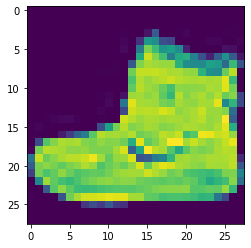

In [6]:
plt.imshow(x_train[0])

In [23]:
x_test.shape

(10000, 28, 28)

In [11]:
# from keras.preprocessing.image import ImageDataGenerator

In [12]:
# image_generator = ImageDataGenerator(rescale=1/255)

In [53]:
x_train = x_train /255
x_test = x_test /255

In [54]:
x_train = x_train.reshape(60000,28,28,1)

In [55]:
x_test = x_test.reshape(10000,28,28,1)

In [26]:
from keras.utils.np_utils import to_categorical

In [56]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [34]:
x_train.shape

(60000, 28, 28, 1)

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [57]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.fit(x_train,y_cat_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.7363 - accuracy: 0.73080s - loss: 0.7384 - ac
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.5618 - accuracy: 0.79100s - loss: 0.5624 - accura
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.5040 - accuracy: 0.8170
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.4658 - accuracy: 0.8329
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.4404 - accuracy: 0.8429TA: 0s -
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4249 - accuracy: 0.8481
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4084 - accuracy: 0.8543
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3954 - accuracy: 0.8590
Epoch 9/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3840 - accuracy: 0.8622
Epoch 10

In [35]:
model.metrics_names

['loss', 'accuracy']

In [36]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4161 - accuracy: 0.9053


[0.4160943329334259, 0.9053000211715698]

In [39]:
from sklearn.metrics import classification_report

In [40]:
prediction = model.predict_classes(x_test)

C:\Users\timot\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [42]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.87      0.82      0.84      1000
           3       0.89      0.93      0.91      1000
           4       0.83      0.89      0.86      1000
           5       0.97      0.97      0.97      1000
           6       0.74      0.72      0.73      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

